In [10]:
url = "http://0.0.0.0:8080/form"
path = "DynamicWeb/contacts.txt"

def main_func():
    users = get_next_name_mail(path)
    register_results = register_users(users)
    plot_succ_unsucc_attempts(register_results)
    plot_users_len(register_results)
    write_attempts_users_to_file(register_results)

In [11]:
def get_next_name_mail(file_path):
    with open(file_path, "r") as file_reader:
        yield from file_reader

In [12]:
def register_users(user_gen):
    res_list = list()
    for creds in user_gen:
        name, email = (i.strip() for i in creds.split(",")[:2])
        data_dict = {"name":name, "email":email}
        resp = post(url, data_dict)
        result_tuple = parse_response(resp)
        res_list.append(result_tuple)
    return res_list

In [13]:
import requests as re

responces = list()

def post(url,params):
    response = re.post(url, params)
    response.raw.decode_content = True
    return response.content.decode()

In [14]:
import re as regexp
def parse_response(response):
    list_len_pattern = regexp.compile(r"(?<=>)([0-9]+)(?=</em>)")
    error_message = "Error!"
    list_len = regexp.findall(list_len_pattern, response)[0]
    if error_message in response:
        return False,list_len
    return True, list_len
    

In [15]:
import matplotlib.pyplot as plt

def plot_succ_unsucc_attempts(result_list):
    x = list(range(1,len(result_list)+1))
    y = [i[0] for i in result_list]
    plt.scatter(x, y)
    axes = plt.gca()
    axes.set_yticks((0,1))
    axes.set_xticks(x)
    axes.set_yticklabels(("Error", "Successful"))
    plt.xlabel("Attempt number")
    plt.ylabel("Fail/Success")
    plt.grid()
    plt.show()

In [16]:
def plot_users_len(result_list):
    x = list(range(1,len(result_list)+1))
    y = [int(i[1]) for i in result_list]
    plt.plot(x,y)
    axes = plt.gca()
    axes.set_xticks(x)
    plt.grid()
    plt.xlabel("Attempts")
    plt.ylabel("Users")
    plt.show()

In [17]:
def write_attempts_users_to_file(result_list):
    x = list(range(1,len(result_list)+1))
    with open("attempt_users_len.txt", "wt") as outfile:
        for i in x:
            outfile.write("attempt {} : {} users\n".format(i, result_list[i-1][1]))

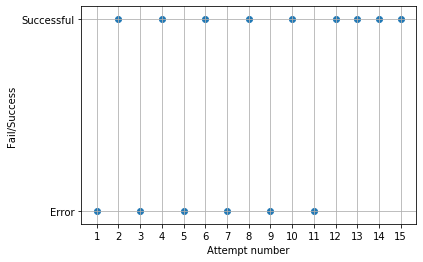

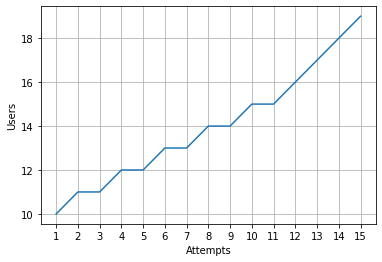

In [18]:
main_func()
